In [3]:
from pylab import *
%matplotlib inline
import random

# 1

In [4]:
def rand(n,t):
    rand = zeros(n+1)
    for i in arange(n):
        rand[i] = array([random.uniform(t[0],t[1])])
    rand = sorted(rand)
    rand[0]=t[0]
    rand[n]=t[1]
    return rand

In [5]:
def raiz_bip(func,x_i,x_d,err=1e-5):
    raiz = 0.5*(x_i+x_d)
    y_i,y_d = func(x_i),func(x_d)
    while abs(raiz - x_d) >= err and abs(y_i - y_d) >= err:
        y_m = func(raiz)
        if y_m == 0.:
            print "chin, le atine :D"
            break
        if y_m*y_i<0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i,y_d = func(x_i),func(x_d)

    return raiz

In [6]:
def bip_a(ec,t,p,err=1e-5):
    #partición aleatoria del dominio
    parti = rand(p,t)
    for i in (arange(p)):
        if ec(parti[i])*ec(parti[i+1]) < 0:
            raiz = raiz_bip(ec,parti[i],parti[i+1])
            print raiz
            
    

In [7]:
def ec1(x):
    return cos(x)+(1.2)*sin(x**x)

In [8]:
bip_a(ec1,[0,2*pi],50)

1.81291063947
2.65622744408
2.70814265702
3.08627830395
3.18297805452
3.82771823508
3.83207239336
4.2186952023
4.543675513
4.64001733938
4.82440067763
5.11929196951
5.8544338066
5.86130689221


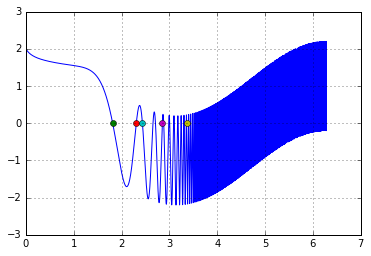

In [7]:
x=linspace(0,2*pi,20000)
plot(x,ec1(x))
grid(True)
plot(1.81291157713,0,'o')
plot(2.30680060362,0,'o')
plot(2.43535587464,0,'o')
plot(2.84974501528,0,'o')
plot(3.36045579069,0,'o')
show()

In [10]:
bip_a(ec1,[0,2*pi],200)

1.81291614738
2.30679864038
2.43536072234
2.65623361252
2.70814254932
2.98381787556
3.00531772773
3.08627862581
3.10300151607
3.16911753687
3.18297420224
3.23858839855
3.25056407067
3.54520612848
3.55210848968
3.9491218679
3.96409678341
4.14739124062
4.19018835496
4.34877953333
4.35049850203
4.36135178666
4.36711710677
4.37750083932
4.3869310451
4.3930049857
4.40945674536
4.429272481
4.44430601971
4.45277551477
4.45417489977
4.51299905421
4.54368226577
4.56748841979
4.60099162033
4.61306103329
4.81819065512
4.85678038775
4.90401395063
4.90743624966
4.91771602691
4.94587308717
4.99313607995
5.04738464058
5.17689275414
5.21515070116
5.23388354156
5.25430526818
5.26107392604
5.31183270001
5.32821136108
5.33427094944
5.45878173141
5.47142522023
5.52820183977
5.56160608432
5.72684007527
5.78381207957
5.82525235867
5.8269278496
5.98188837115
6.00141709185
6.16021430345
6.16147716073


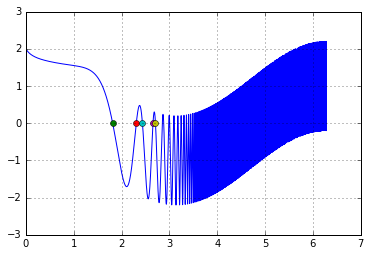

In [187]:
x=linspace(0,2*pi,20000)
plot(x,ec1(x))
grid(True)
plot(1.81291157713,0,'o')
plot(2.30680060362,0,'o')
plot(2.43535587464,0,'o')
plot(2.65623080908,0,'o')
plot(2.70814726674,0,'o')
show()

# 2

In [8]:
def bip_a2(ec,t,p,err=1e-5):
    #partición aleatoria del dominio
    raiz = zeros(p)
    parti = rand(p,t)
    for i in (arange(p)):
        if ec(parti[i])*ec(parti[i+1]) < 0:
            raiz[i] = raiz_bip(ec,parti[i],parti[i+1])
    raiz = raiz[raiz !=0]       

    return raiz

In [121]:
def ec2(x,y):
    return 2*exp((-1)*((x+1)**2))*((exp((-1)*((y+2)**2))) + exp((-1)*((y-2)**2))) + 6*x*(x**2+y**2)*exp((-1)*(x**2+y**2)) - 1

In [10]:
def bip_a22(ec,t2,p,err=1e-5):
    x = linspace(t2[0],t2[1])
    raiz
    for n in arange(len(x)):
        def ecb(y):
            return ec(x[n],y)
        raiz = zeros(p)
        y = rand(p,t2)
        for i in (arange(p)):
            if ecb(y[i])*ecb(y[i+1]) < 0:
                raizy[i] = raiz_bip(ec,y[i],y[i+1])
        raizy = raizy[raizy !=0]
        raiz = array([x[n],raizy])
    print raiz

In [116]:
def bip_a23(ec,t2,p,err=1e-5):
    x = linspace(t2[0],t2[1],p)
    raiz = zeros([p*p,2])
    for n in arange(len(x)):
        def ecb(y):
            return ec(x[n],y)
        y = rand(p,t2)
        for i in (arange(p)):
            if ecb(y[i])*ecb(y[i+1]) < 0:
                raizy = raiz_bip(ecb,y[i],y[i+1])
                raiz[i+n*p,:] = [x[n],raizy]
    raiz = raiz[raiz[:,1] !=0]      
    return raiz

In [126]:
raiz = bip_a23(ec2,[-4,4,-4,4],300)
#print raiz

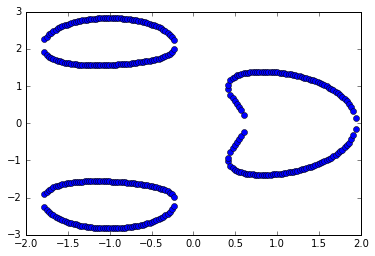

In [129]:
plot(raiz[:,0],raiz[:,1],'o')

# 3

In [130]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2] #porque r_v es una lista que trae las condiciones iniviales...r_v=[x,y,vx,vy] y esto se comporta como [0,1,2,3]
    dy = r_v[3]
    
    if fric==0:
        dvx,dvy = 0, -(g/m)
        
    else:
        dvx = -  fric([r_v[2],r_v[3]])[0] #nuestro modelo de fricción sólo depende de la velocidad 
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]

    
    return array([dx,dy,dvx,dvy])


In [131]:
def fric_id(v):
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y= gamma*norm_v*v[1]
    return array([f_x,f_y])

In [170]:
def rk4_a(ec,p_ini,x,args=0,h=0.0001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

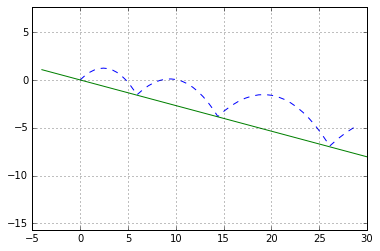

In [189]:
p = [0,0,5,5]
N = 50
ang = pi/12
pend = tan(ang)
trayectoria = zeros((N,len(p)))
mi_dt = .1
trayectoria[0,:] = array(p)
for i in range(N-1):
    t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if (sol_dt[-1,:][1] + pend*sol_dt[-1,:][0]) < 0:
        #print "buscando punto de rebote"
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:]
        t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)
        y_med = sol[-1,:]
        while abs(y_izq[1] + pend*y_izq[0]) > 1e-1:
            if (y_izq[1] + pend*y_izq[0])*(y_med[1] + pend*y_izq[0]) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric_v)
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*cos(ang)-y_izq[3]*sin(ang)),(-y_izq[2]*sin(ang)-y_izq[3]*cos(ang))])
        trayectoria[i+1,:] = y_izq    
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,30)
plot(x,-tan(ang)*x)
plt.axis('equal')
grid(True)

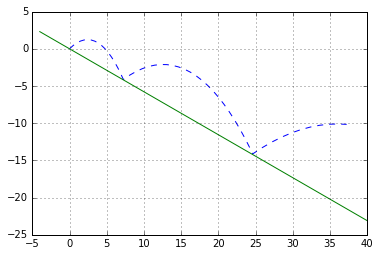

In [191]:
p = [0,0,5,5]
N = 50
ang = pi/6
pend = tan(ang)
trayectoria = zeros((N,len(p)))
mi_dt = .1
trayectoria[0,:] = array(p)
for i in range(N-1):
    t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if (sol_dt[-1,:][1] + pend*sol_dt[-1,:][0]) < 0:
        #print "buscando punto de rebote"
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:]
        t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)
        y_med = sol[-1,:]
        while abs(y_izq[1] + pend*y_izq[0]) > 1e-1:
            if (y_izq[1] + pend*y_izq[0])*(y_med[1] + pend*y_izq[0]) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric_v)
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*cos(ang)-y_izq[3]*sin(ang)),(-y_izq[2]*sin(ang)-y_izq[3]*cos(ang))])
        trayectoria[i+1,:] = y_izq    
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,40)
plot(x,-tan(ang)*x)
plt.axis('equal')
grid(True)

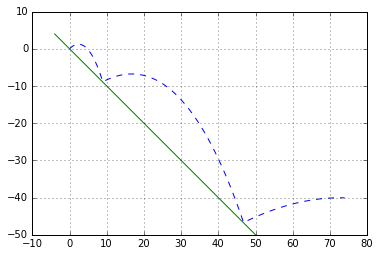

In [193]:
p = [0,0,5,5]
N = 70
ang = pi/4
pend = tan(ang)
trayectoria = zeros((N,len(p)))
mi_dt = .1
trayectoria[0,:] = array(p)
for i in range(N-1):
    t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if (sol_dt[-1,:][1] + pend*sol_dt[-1,:][0]) < 0:
        #print "buscando punto de rebote"
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:]
        t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)
        y_med = sol[-1,:]
        while abs(y_izq[1] + pend*y_izq[0]) > 1e-1:
            if (y_izq[1] + pend*y_izq[0])*(y_med[1] + pend*y_izq[0]) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric_v)
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*cos(ang)-y_izq[3]*sin(ang)),(-y_izq[2]*sin(ang)-y_izq[3]*cos(ang))])
        trayectoria[i+1,:] = y_izq    
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-4,50)
plot(x,-tan(ang)*x)
plt.axis('equal')
grid(True)

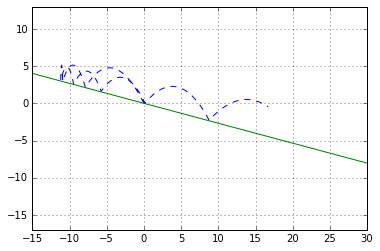

In [199]:
p = [0,0,-5,10]
N = 120
ang = pi/12
pend = tan(ang)
trayectoria = zeros((N,len(p)))
mi_dt = .1
trayectoria[0,:] = array(p)
for i in range(N-1):
    t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if (sol_dt[-1,:][1] + pend*sol_dt[-1,:][0]) < 0:
        #print "buscando punto de rebote"
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:]
        t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)
        y_med = sol[-1,:]
        while abs(y_izq[1] + pend*y_izq[0]) > 1e-1:
            if (y_izq[1] + pend*y_izq[0])*(y_med[1] + pend*y_izq[0]) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric_v)
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*cos(ang)-y_izq[3]*sin(ang)),(-y_izq[2]*sin(ang)-y_izq[3]*cos(ang))])
        trayectoria[i+1,:] = y_izq    
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]

plot(trayectoria[:,0],trayectoria[:,1],'--')
x = linspace(-15,30)
plot(x,-tan(ang)*x)
plt.axis('equal')
grid(True)

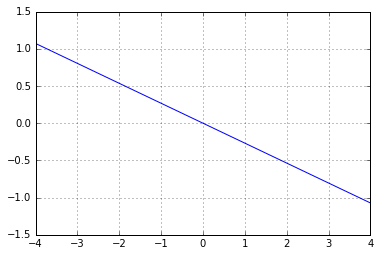

In [144]:
x = linspace(-4,4)
plot(x,-tan(pi/12)*x)
grid(True)

In [94]:
b= linspace(-4,4,7)
a = len(b)
print a

7


In [63]:
a=arange(2)
b= linspace(0,1,5)
print a
print b[1]

[0 1]
0.25


In [90]:
def bip_a24(ec,t2,p,err=1e-5):
    x = [-1.47368421]
    raiz = zeros([p*(len(x)),2])
    for n in arange(len(x)):
        def ecb(y):
            return ec(x[n],y)
        y = rand(p,t2)
        for i in (arange(p)):
            if ecb(y[i])*ecb(y[i+1]) < 0:
                raizy = raiz_bip(ecb,y[i],y[i+1])
                raiz[i*(n+1),:] = [x[n],raizy]
    raiz = raiz[raiz[:,0] > 0.001]      
    return raiz

In [91]:
raiz = bip_a24(ec2,[-4,4,-4,4],50)
print raiz

[]


In [48]:
t2 = [0,5]
p = 8
x = [0]
raiz = zeros([p*(len(x)),2])
print x
print raiz

[0]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [71]:
ec2(-2.41084047,-1.7755432)

-0.75674138465536167

In [15]:
a = bip_a2(ec1,[0,2*pi],50)
print a

[ 1.81290872  2.30680065  2.43535482  2.84974883  2.8803519   2.98381873
  3.10299759  3.23858047  3.25056422  3.82772186  3.847391    3.92511275
  3.95267316  4.4900268   4.53586694  4.68170636  4.91288571  4.96242213
  5.08636734  5.2015583   5.3999847   5.58535366]


In [81]:
bip_a(0,[0,5],20)

[0.06966452379149668, 0.42025683802317915, 0.86275229858689739, 1.0390686584199638, 2.0674562043427933, 2.1933629205442844, 2.3058500053400603, 2.3251891121486432, 2.3838079809914654, 2.7868282893666851, 2.9450680018207933, 3.0385158716535043, 3.0882408806565325, 3.636707920411657, 3.7145635353298778, 3.8336173950732566, 3.9359316726410571, 4.245733994403472, 4.5296285052665981, 4.6064925763375424]


<function __main__.rand>

In [74]:
b=rand(10)
c=random.uniform(1,5)
print c

[0.1765431751346116, 0.19565450850473753, 0.50866221114498722, 0.7142027006175321, 0.777786035686306, 0.79382318662291484, 0.79459546125030711, 0.84098134726994722, 0.93187432370862666, 0.96997890836439482]
4.86388044935


In [72]:
a=arange(2.5,6)
b=array([2]*4)
c=arange(10)*2
d=zeros(4)
print a
print b
print c,d
print b*2

[ 2.5  3.5  4.5  5.5]
[2 2 2 2]
[ 0  2  4  6  8 10 12 14 16 18] [ 0.  0.  0.  0.]
[4 4 4 4]


In [84]:
arange(5)+1

array([1, 2, 3, 4, 5])

In [152]:
linspace(0,5,100)

array([ 0.        ,  0.05050505,  0.1010101 ,  0.15151515,  0.2020202 ,
        0.25252525,  0.3030303 ,  0.35353535,  0.4040404 ,  0.45454545,
        0.50505051,  0.55555556,  0.60606061,  0.65656566,  0.70707071,
        0.75757576,  0.80808081,  0.85858586,  0.90909091,  0.95959596,
        1.01010101,  1.06060606,  1.11111111,  1.16161616,  1.21212121,
        1.26262626,  1.31313131,  1.36363636,  1.41414141,  1.46464646,
        1.51515152,  1.56565657,  1.61616162,  1.66666667,  1.71717172,
        1.76767677,  1.81818182,  1.86868687,  1.91919192,  1.96969697,
        2.02020202,  2.07070707,  2.12121212,  2.17171717,  2.22222222,
        2.27272727,  2.32323232,  2.37373737,  2.42424242,  2.47474747,
        2.52525253,  2.57575758,  2.62626263,  2.67676768,  2.72727273,
        2.77777778,  2.82828283,  2.87878788,  2.92929293,  2.97979798,
        3.03030303,  3.08080808,  3.13131313,  3.18181818,  3.23232323,
        3.28282828,  3.33333333,  3.38383838,  3.43434343,  3.48

In [232]:
x=array([1,0,9])
b = trim_zeros(x)
print b
print zeros(3)

[1 0 9]
[ 0.  0.  0.]


In [256]:
a=array([1,0,1,0])
a = a[a !=0]
print b

[1 1]


In [115]:
a=zeros([3,2])
a[0,:]=[1,0]
a[1,:]=[1,1]
a[2,:]=[2,2]
#a[~(a[:,1]==0), :]
#a = a[a[:,0] > 0.1]
a = a[a[:,1] !=0]  
print a

[[ 1.  1.]
 [ 2.  2.]]


In [21]:
arange(len([1,2]))

array([0, 1])

In [79]:
a=array([1,2])
print a

[1 2]


In [24]:
array([[1,2],[1,1]])

array([[1, 2],
       [1, 1]])